In [1]:
"""
Runs parity checker with regularization.
"""

"Runs parity checker with regularization.\n"

In [2]:
using Revise
includet("../codebase/mlp.jl")

using Knet, Plots, Statistics, LinearAlgebra, Random, .mlp

In [3]:
# parameters

In [4]:
n=12 # length of input bit array
xdim = n
h1=h2=h3=2*n # hidden layer sizes
ydim = 1 # output is the probability for even parity
nbatch = 100 # number of bit strings presented at each iteration
ntest = div(2^n,8) # keep 1/8-th as test set
niter = 9*10^4 # number of training iterations

90000

In [5]:
# NN parameters
w1 = Param(randn(h1,xdim))
b1 = Param(randn(h1))
w2 = Param(randn(h2,h1))
b2 = Param(randn(h2))
w3 = Param(randn(h3,h2))
b3 = Param(randn(h3))
w4 = Param(randn(1,h3))
b4 = Param(randn(1))
w = (w1,w2,w3,w4)
b = (b1,b2,b3,b4)

(P(Array{Float64,1}(24)), P(Array{Float64,1}(24)), P(Array{Float64,1}(24)), P(Array{Float64,1}(1)))

In [6]:
trainidx, testidx = mlp.gen_data(n, ntest)

([1, 2, 4, 5, 6, 7, 8, 9, 10, 11  …  4084, 4085, 4086, 4087, 4088, 4089, 4091, 4092, 4094, 4095], [2492, 953, 2928, 2500, 2562, 651, 835, 2009, 1709, 3901  …  2351, 2836, 269, 2956, 3321, 874, 3943, 1485, 739, 685])

In [7]:
@time w, b, losstrn, losstst, rho = mlp.backprop(w, b, niter, trainidx, testidx, n, ntest, nbatch, (xdim, h1, h2, h3, ydim); LR = 0.1, λ= 0.001);

┣████████████████████┫ [100.00%, 90000/90000, 01:24/01:24, 1070.35i/s] 


 87.318308 seconds (129.97 M allocations: 65.191 GiB, 16.93% gc time)


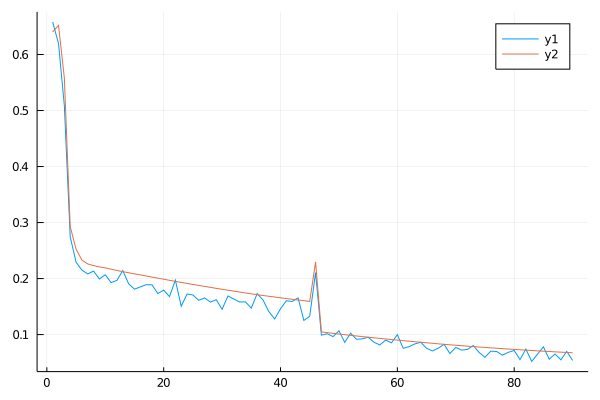

In [8]:
plot(losstrn)
plot!(losstst) 

In [9]:
xtrn, ytrn, xtst, ytst = mlp.split_data(trainidx, testidx, n, ntest)

([0 0 … 1 1; 0 0 … 1 1; … ; 0 1 … 1 1; 1 0 … 0 1], [1 1 … 1 0], [1 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 1 0; 0 1 … 1 1], [1 1 … 0 0])

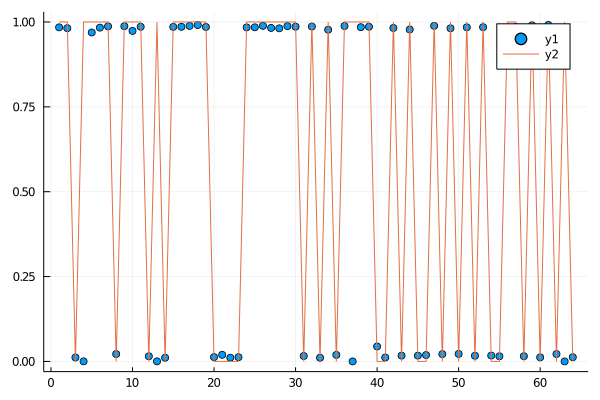

In [10]:
np=min(ntest,64)
scatter(pred(w,b,xtst)[1:np]
#    ,xlim=(0,np)
)
plot!(ytst[1:np])

In [11]:
# accuracy
function acc(x,y)
    cnt = 0
    tot = length(x[1,:])
    for i=1:tot-1
        chk = (pred(w,b,x[:,i])[1] - y[i][1])^2
        if (chk < 0.5)
            cnt += 1
        end
    end
    return 1.0*cnt/tot
end

trainidx, testidx = mlp.gen_data(n, ntest)
xtrn, ytrn, xtst, ytst = mlp.split_data(trainidx, testidx, n, ntest)

([0 0 … 1 1; 0 0 … 1 1; … ; 0 1 … 1 1; 1 0 … 0 1], [1 1 … 1 0], [0 0 … 1 1; 1 1 … 0 1; … ; 1 1 … 1 0; 0 1 … 1 1], [0 1 … 1 0])

In [12]:
acc(xtrn,ytrn),acc(xtst,ytst)

(0.9676248953391013, 0.9609375)

In [13]:
sumtrn = 0.0; sumtst = 0.0

for i=1:100
    trainidx, testidx = mlp.gen_data(n, ntest)
    xtrn, ytrn, xtst, ytst = mlp.split_data(trainidx, testidx, n, ntest)
    sumtrn += acc(xtrn,ytrn); sumtst += acc(xtst,ytst)
end

(sumtrn/100,sumtst/100) # (overfitted but works)

(0.9670220485626573, 0.96521484375)

In [14]:
# distribution of weights
histogram(reshape(w1,:,1)[:,1],normalize=:pdf)

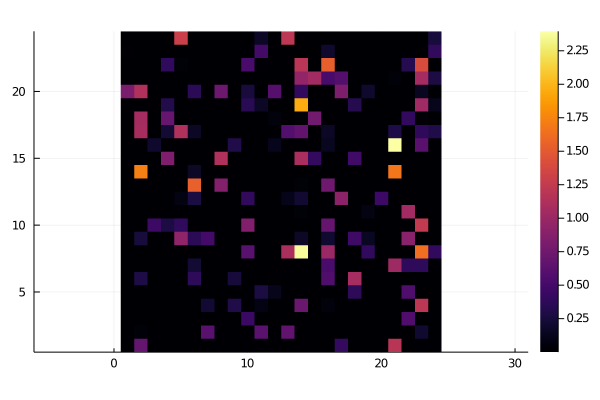

In [15]:
heatmap(abs.(value(w2)),aspect_ratio=1)

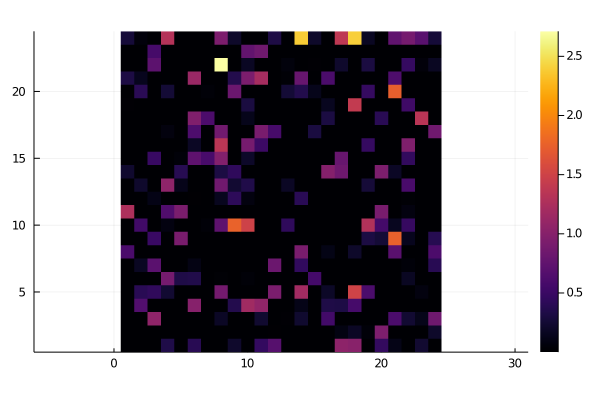

In [16]:
heatmap(abs.(value(w3)),aspect_ratio=1)

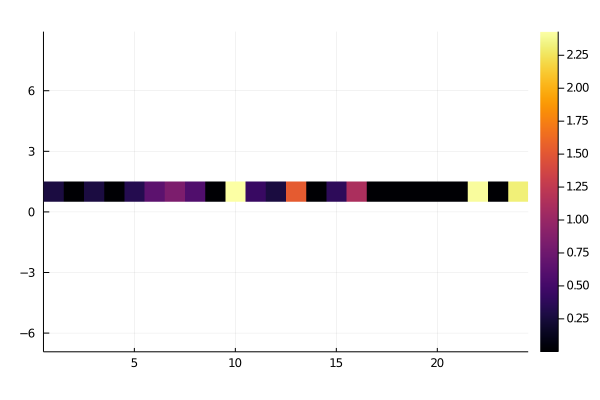

In [17]:
heatmap(abs.(value(w4)),aspect_ratio=1)

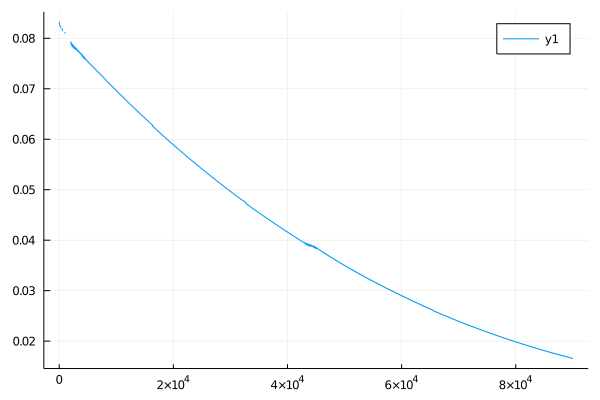

In [18]:
plot(rho)